In [9]:
import pandas as pd
df = pd.read_csv('TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3560,2024-08-21,222.669998,224.660004,218.860001,223.270004,223.270004,70146000
3561,2024-08-22,223.820007,224.800003,210.320007,210.660004,210.660004,79514500
3562,2024-08-23,214.460007,221.479996,214.210007,220.320007,220.320007,81525200
3563,2024-08-26,218.750000,219.089996,211.009995,213.210007,213.210007,59301200


In [10]:
df = df[['Date', 'Open', 'High','Low', 'Close', 'Volume']]
df

,Date,Open,High,Low,Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500
...,...,...,...,...,...,...
3560,2024-08-21,222.669998,224.660004,218.860001,223.270004,70146000
3561,2024-08-22,223.820007,224.800003,210.320007,210.660004,79514500
3562,2024-08-23,214.460007,221.479996,214.210007,220.320007,81525200
3563,2024-08-26,218.750000,219.089996,211.009995,213.210007,59301200


In [11]:
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year = year, month=month, day=day)

datetime_object = str_to_datetime('2010-06-29')
datetime_object

datetime.datetime(2010, 6, 29, 0, 0)

In [12]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

/var/folders/rq/dczdb3md0kbb6vc41s3nhhq00000gn/T/ipykernel_78230/2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2010-06-29
1      2010-06-30
2      2010-07-01
3      2010-07-02
4      2010-07-06
          ...    
3560   2024-08-21
3561   2024-08-22
3562   2024-08-23
3563   2024-08-26
3564   2024-08-27
Name: Date, Length: 3565, dtype: datetime64[ns]

In [13]:
df.index = df.pop('Date')
df

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500
...,...,...,...,...,...
2024-08-21,222.669998,224.660004,218.860001,223.270004,70146000
2024-08-22,223.820007,224.800003,210.320007,210.660004,79514500
2024-08-23,214.460007,221.479996,214.210007,220.320007,81525200


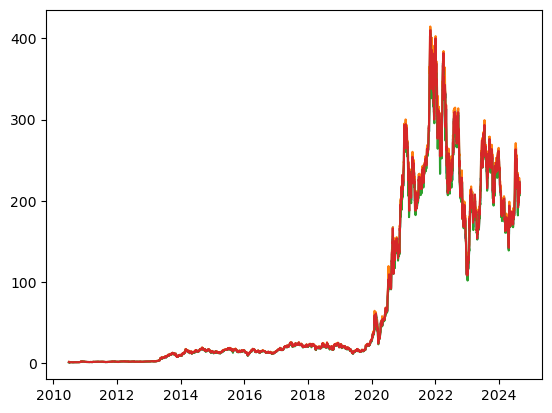

In [18]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Open'])
plt.plot(df.index, df['High'])
plt.plot(df.index, df['Low'])
plt.plot(df.index, df['Close'])

In [29]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    # Extract Close, Open, High, Low values as input features
    close_values = df_subset['Close'].to_numpy()
    open_values  = df_subset['Open'].to_numpy()
    high_values  = df_subset['High'].to_numpy()
    low_values   = df_subset['Low'].to_numpy()

    # Combine these features into a single array X (shape: n, n_features)
    x = np.hstack((close_values[:-1], open_values[:-1], high_values[:-1], low_values[:-1]))

    y = close_values[-1]  # Target value

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  n_features = len(np.hstack((close_values[:-1], open_values[:-1], high_values[:-1], low_values[:-1])))
  
  # Add feature columns to the DataFrame
  for i in range(n_features):
    if i < 3:
      col_name = f'Close-{n-i}'
    elif i < 6:
      col_name = f'Open-{n-(i-3)}'
    elif i < 9:
      col_name = f'High-{n-(i-6)}'
    else:
      col_name = f'Low-{n-(i-9)}'

    ret_df[col_name] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df, 
                                '2023-08-29', 
                                '2024-08-27', 
                                n=3)
print(windowed_df)

    Target Date     Close-3     Close-2     Close-1      Open-3      Open-2  \
0    2023-08-29  230.039993  238.589996  238.820007  238.660004  231.309998   
1    2023-08-30  238.589996  238.820007  257.179993  231.309998  242.580002   
2    2023-08-31  238.820007  257.179993  256.899994  242.580002  238.580002   
3    2023-09-01  257.179993  256.899994  258.079987  238.580002  254.199997   
4    2023-09-05  256.899994  258.079987  245.009995  254.199997  255.979996   
..          ...         ...         ...         ...         ...         ...   
246  2024-08-21  216.119995  222.720001  221.100006  211.149994  217.070007   
247  2024-08-22  222.720001  221.100006  223.270004  217.070007  224.880005   
248  2024-08-23  221.100006  223.270004  210.660004  224.880005  222.669998   
249  2024-08-26  223.270004  210.660004  220.320007  222.669998  223.820007   
250  2024-08-27  210.660004  220.320007  213.210007  223.820007  214.460007   

         Open-1      High-3      High-2      High-1

In [30]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  feature_cols = list(range(1, len(df_as_np[0]) - 1))  # Get indices of feature columns (Close, Open, High, Low)
  
  middle_matrix = df_as_np[:, [0] + feature_cols]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, [-1]]  # Target column is 'Target'

  # Convert dates and Y to numerical arrays
  dates_numerical = dates.astype('float64').view(np.float64)  # Use np.float64 instead of float32 for Timestamp conversion
  Y_numerical = Y[:, -1].astype('float64')  # Directly convert the target values to float64

  return dates_numerical, X.astype(np.float32), Y_numerical.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)
print(dates.shape, X.shape, y.shape)

TypeError: float() argument must be a string or a real number, not 'Timestamp'

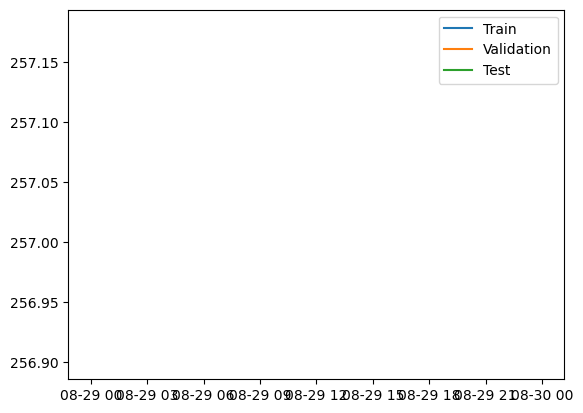

In [31]:

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 45574.7461 - mean_absolute_error: 210.7453 - val_loss: 50591.5859 - val_mean_absolute_error: 222.7826
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44260.3125 - mean_absolute_error: 207.4757 - val_loss: 50391.8398 - val_mean_absolute_error: 222.3332
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44595.9219 - mean_absolute_error: 208.3333 - val_loss: 50160.1797 - val_mean_absolute_error: 221.8116
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43974.9062 - mean_absolute_error: 206.8583 - val_loss: 49874.8867 - val_mean_absolute_error: 221.1676
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44342.2266 - mean_absolute_error: 207.7543 - val_loss: 49528.3633 - val_mean_absolute_error: 220.3810
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43966.4844 - mean_absolute_error: 206.6502 - val_loss: 49053.9609 - val_mean_absolute_error: 219.3022
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/s

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


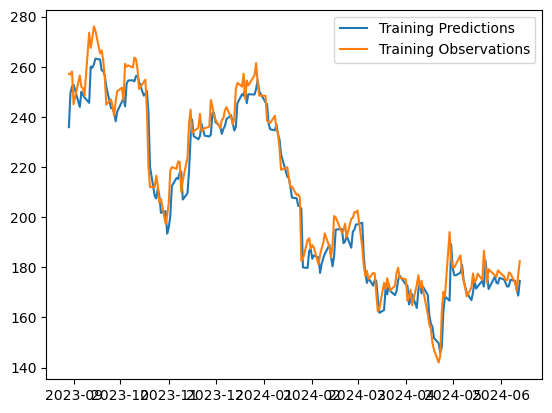

In [56]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


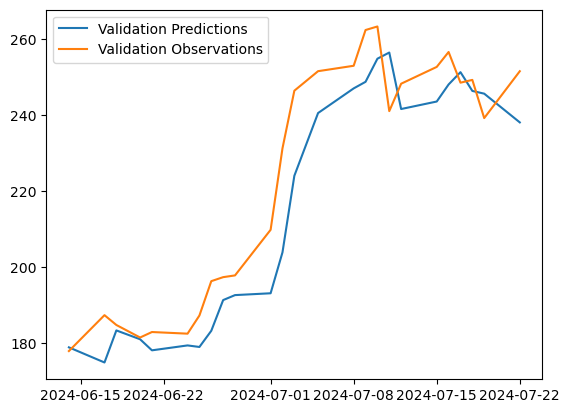

In [57]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


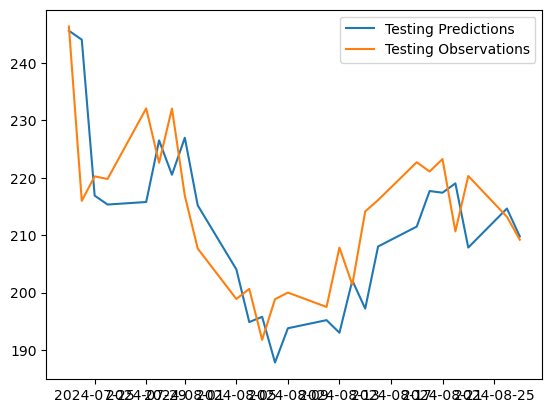

In [58]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

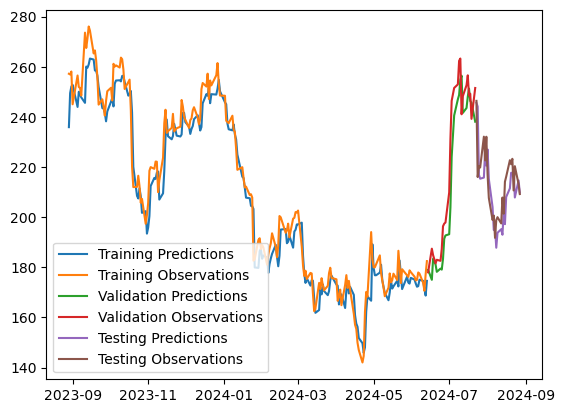

In [59]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [60]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/ste

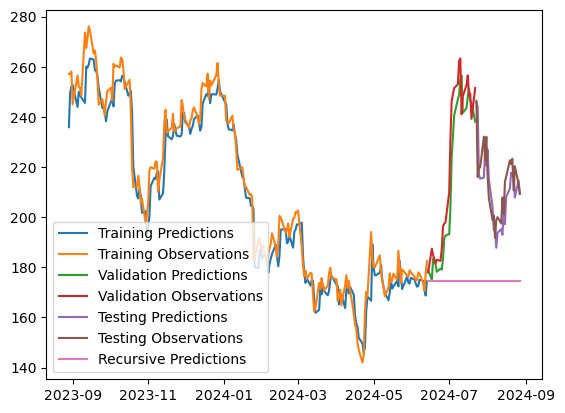

In [61]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])